In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv('sales.csv', encoding='unicode_escape')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [5]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [7]:
#check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
df["Amount"] = df["Amount"].astype(int)

In [10]:
df["Amount"].dtype

dtype('int32')

In [11]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [ ]:
# Exploratory Data Analysis 

In [31]:
# Gender 

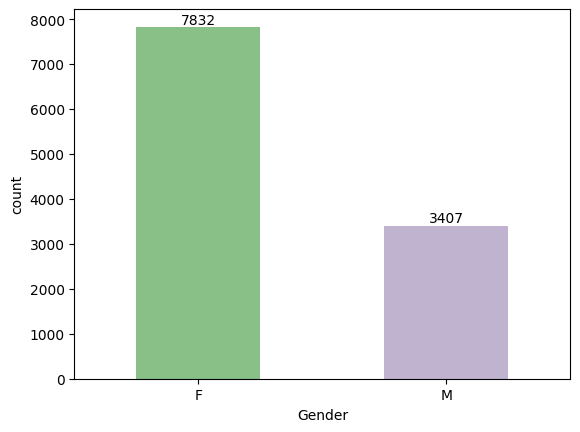

In [12]:
a = sns.countplot(x = "Gender",data = df,palette = "Accent",width = 0.5,hue = "Gender")

# to see the exact values on the bar 
for bars in a.containers:
    a.bar_label(bars)

plt.show()

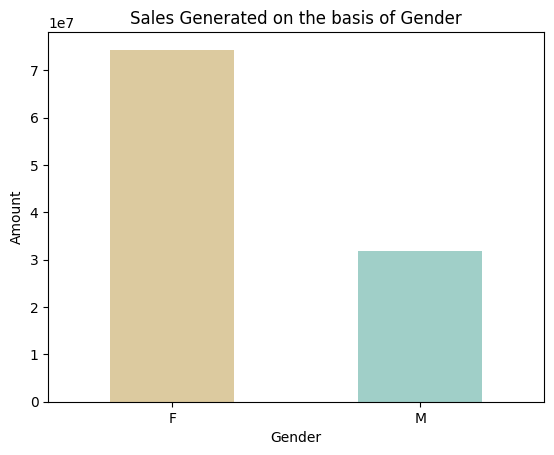

In [13]:
gen = df.groupby("Gender")["Amount"].sum().reset_index()
sns.barplot(x = "Gender",y="Amount", data = gen,width = 0.5,hue = "Gender" , palette = "BrBG")

plt.title("Sales Generated on the basis of Gender")
plt.show()

In [ ]:
#AGE

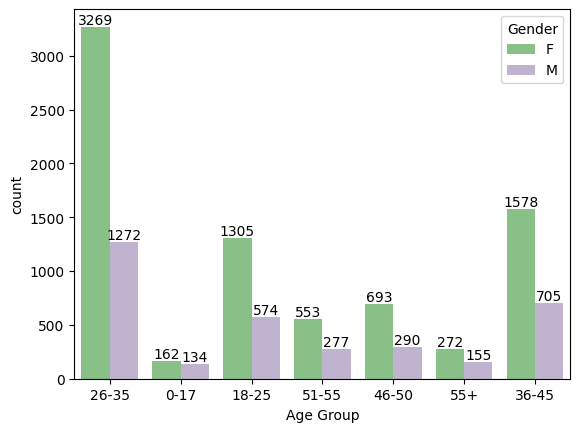

In [14]:
a = sns.countplot(x = 'Age Group', hue = 'Gender',data = df,palette = "Accent")

for bars in a.containers:
    a.bar_label(bars)

In [15]:
# bar plot on the basis of age Group and total sales 
gen = df.groupby("Age Group")["Amount"].sum().reset_index()
genSort = gen.sort_values(by = "Amount", ascending = False)
genSort.reset_index(drop = False)

,index,Age Group,Amount
0,2,26-35,42613442
1,3,36-45,22144994
2,1,18-25,17240732
3,4,46-50,9207844
4,5,51-55,8261477
5,6,55+,4080987
6,0,0-17,2699653


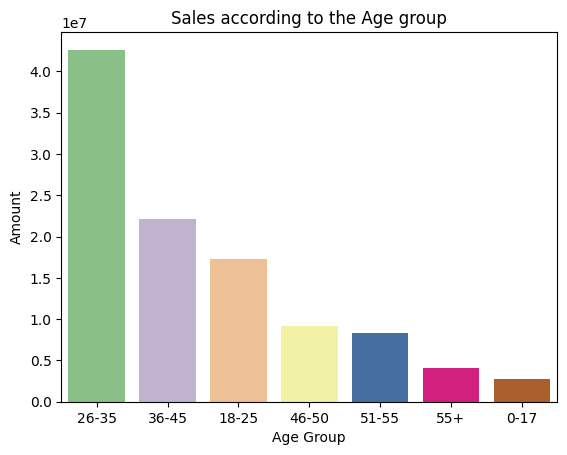

In [16]:
sns.barplot(x="Age Group",y="Amount",data = genSort,palette = "Accent",hue = "Age Group")
plt.title("Sales according to the Age group")
plt.show()

In [17]:
# total number of orders from top 10 states

order = df.groupby("State")["Orders"].sum().reset_index()
sort = order.sort_values(by ="Orders",ascending = False)
sort.head(10).reset_index(drop = False)

,index,State,Orders
0,14,Uttar Pradesh,4807
1,10,Maharashtra,3810
2,7,Karnataka,3240
3,2,Delhi,2740
4,9,Madhya Pradesh,2252
5,0,Andhra Pradesh,2051
6,5,Himachal Pradesh,1568
7,8,Kerala,1137
8,4,Haryana,1109
9,3,Gujarat,1066


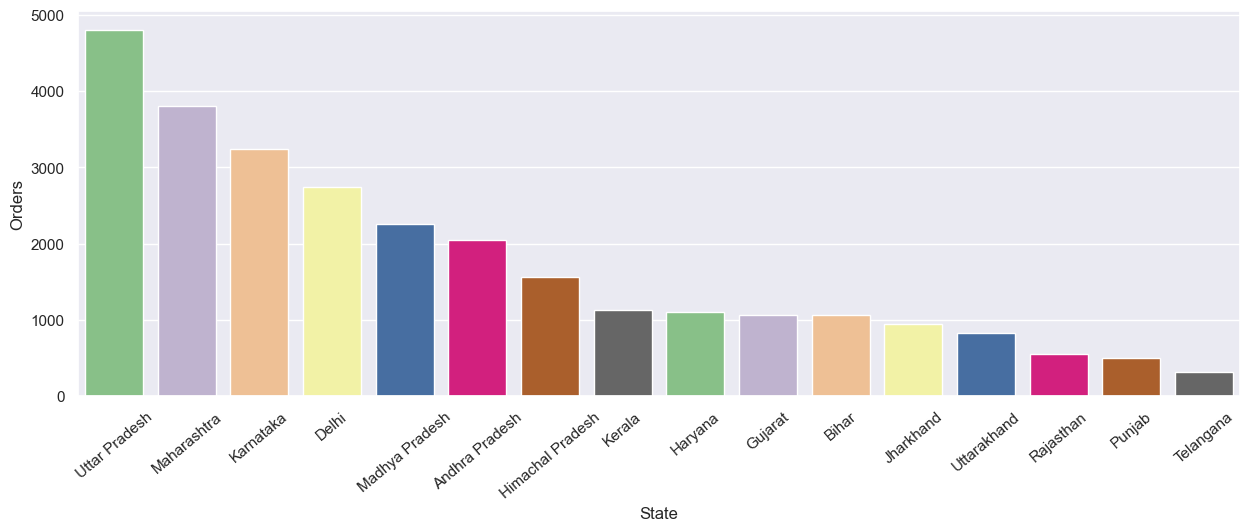

In [18]:
# Bar Plot for total number of orders from top 10 state
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = "State",y = "Orders",data = sort,palette = "Accent",hue = "State")
plt.xticks(rotation = 40)
plt.show()

In [19]:
# total number of sales from top 10 states

order = df.groupby("State")["Amount"].sum().reset_index()
sort = order.sort_values(by ="Amount",ascending = False)
sort.head(10).reset_index(drop = False)

,index,State,Amount
0,14,Uttar Pradesh,19374968
1,10,Maharashtra,14427543
2,7,Karnataka,13523540
3,2,Delhi,11603818
4,9,Madhya Pradesh,8101142
5,0,Andhra Pradesh,8037146
6,5,Himachal Pradesh,4963368
7,4,Haryana,4220175
8,1,Bihar,4022757
9,3,Gujarat,3946082


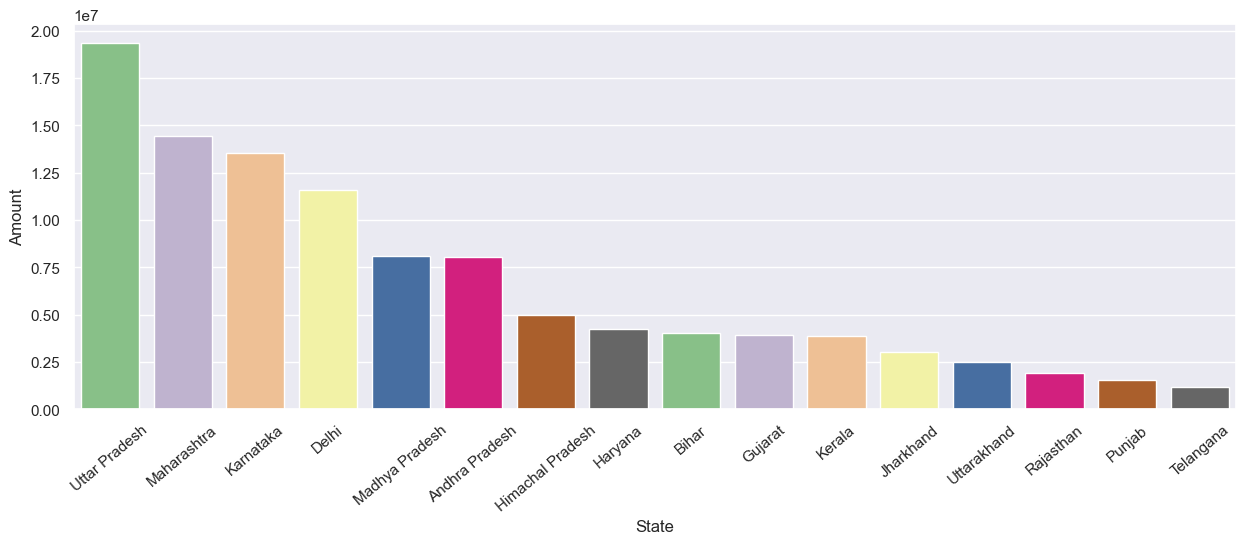

In [20]:
# Bar Plot for total number of orders from top 10 state
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = "State",y = "Amount",data = sort,palette = "Accent",hue = "State")
plt.xticks(rotation = 40)
plt.show()

In [ ]:
# From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

In [112]:
#maritial status

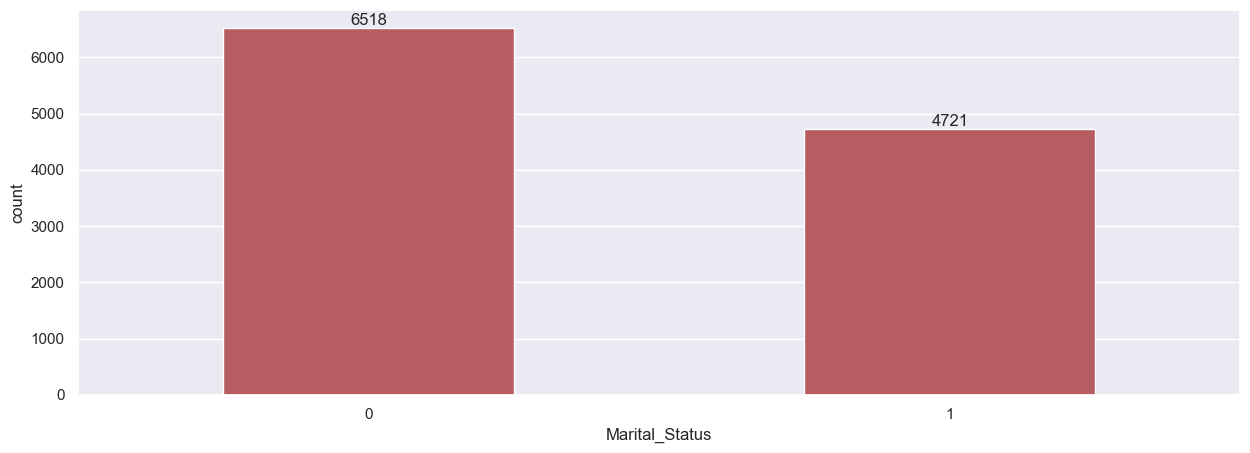

In [21]:

a = sns.countplot(x = "Marital_Status",data = df,width = 0.5,color = "r")

# to see the exact values on the bar 
for bars in a.containers:
    a.bar_label(bars)

plt.show()

In [22]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924


In [23]:
sales = df.groupby(["Marital_Status","Gender"])["Amount"].sum().reset_index()
sort = sales.sort_values(by = "Amount",ascending = False)
sort

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


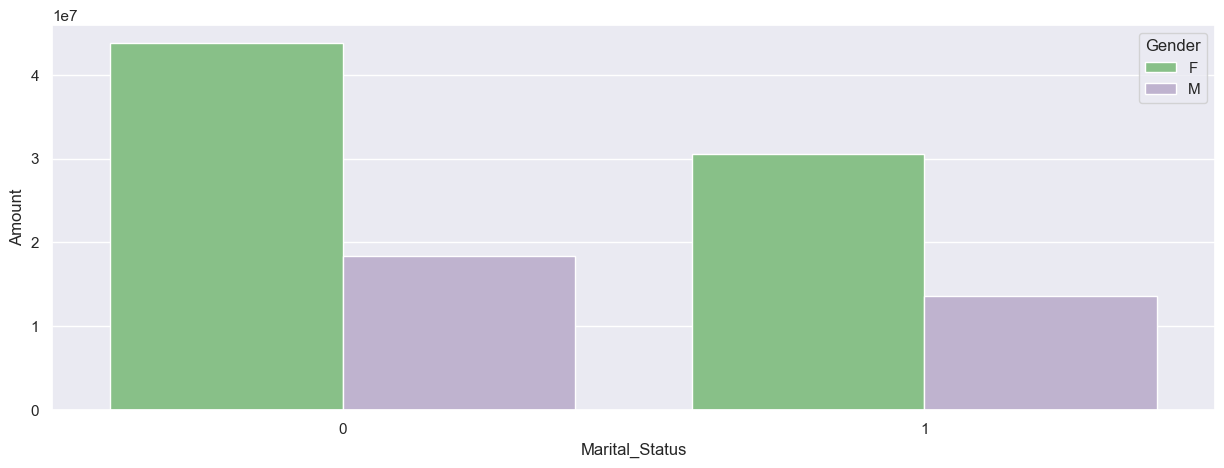

In [24]:
sns.barplot(x="Marital_Status", y = "Amount",data = sort , hue = "Gender", palette = "Accent")
plt.show()

In [131]:
# OCCUPATION 

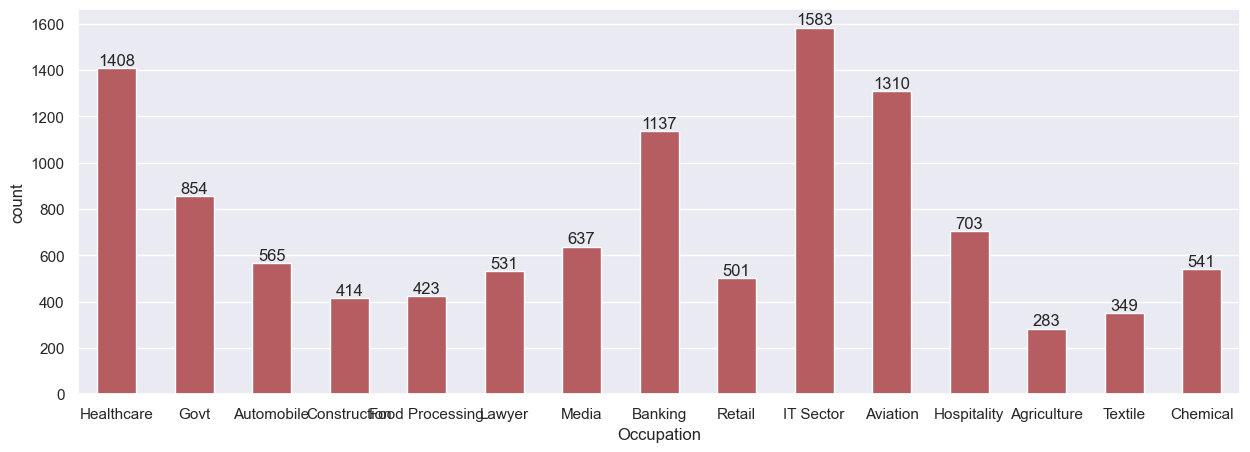

In [25]:

a = sns.countplot(x = "Occupation",data = df,width = 0.5,color = "r")

# to see the exact values on the bar 
for bars in a.containers:
    a.bar_label(bars)

plt.show()

In [28]:
sales = df.groupby("Occupation")["Amount"].sum().reset_index()
sort = sales.sort_values(by = "Amount",ascending = False)
sort.reset_index(drop = True)

,Occupation,Amount
0,IT Sector,14755079
1,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
4,Govt,8517212
5,Hospitality,6376405
6,Media,6295832
7,Automobile,5368596
8,Chemical,5297436
9,Lawyer,4981665


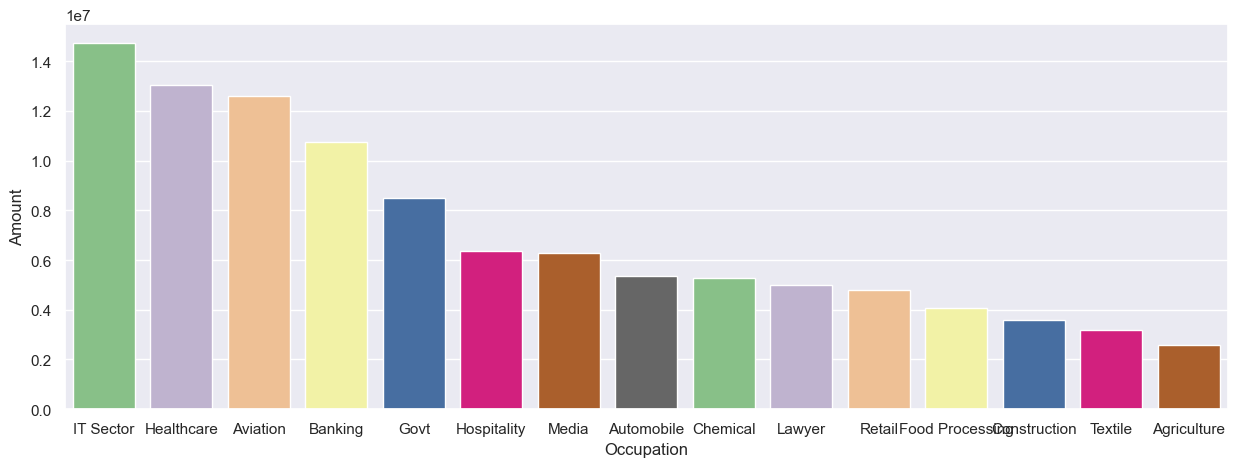

In [30]:
sns.barplot(x="Occupation", y = "Amount",data = sort, palette = "Accent",hue = "Occupation")
plt.show()

In [ ]:
# PRODUCT CATEGORY

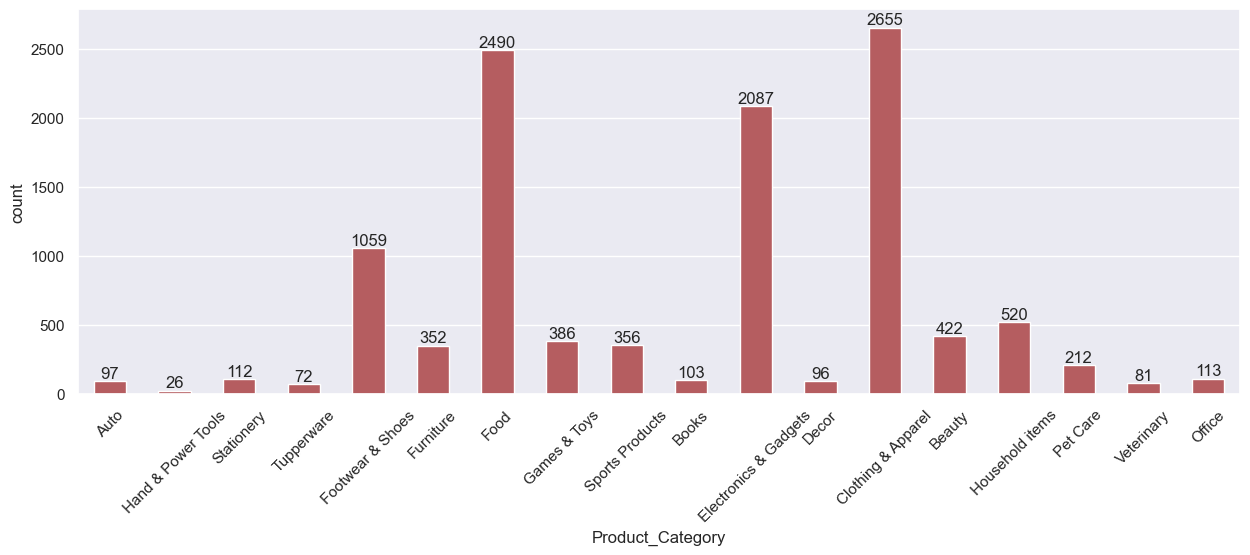

In [31]:
a = sns.countplot(x = "Product_Category",data = df,width = 0.5,color = "r")

# to see the exact values on the bar 
for bars in a.containers:
    a.bar_label(bars)
plt.xticks(rotation = 45)
plt.show()

In [32]:
sales = df.groupby("Product_Category")["Amount"].sum().reset_index()
sort = sales.sort_values(by = "Amount",ascending = False)
sort.head(10).reset_index(drop = True)

,Product_Category,Amount
0,Food,33933883
1,Clothing & Apparel,16495019
2,Electronics & Gadgets,15643846
3,Footwear & Shoes,15575209
4,Furniture,5440051
5,Games & Toys,4331694
6,Sports Products,3635933
7,Beauty,1959484
8,Auto,1958609
9,Stationery,1676051


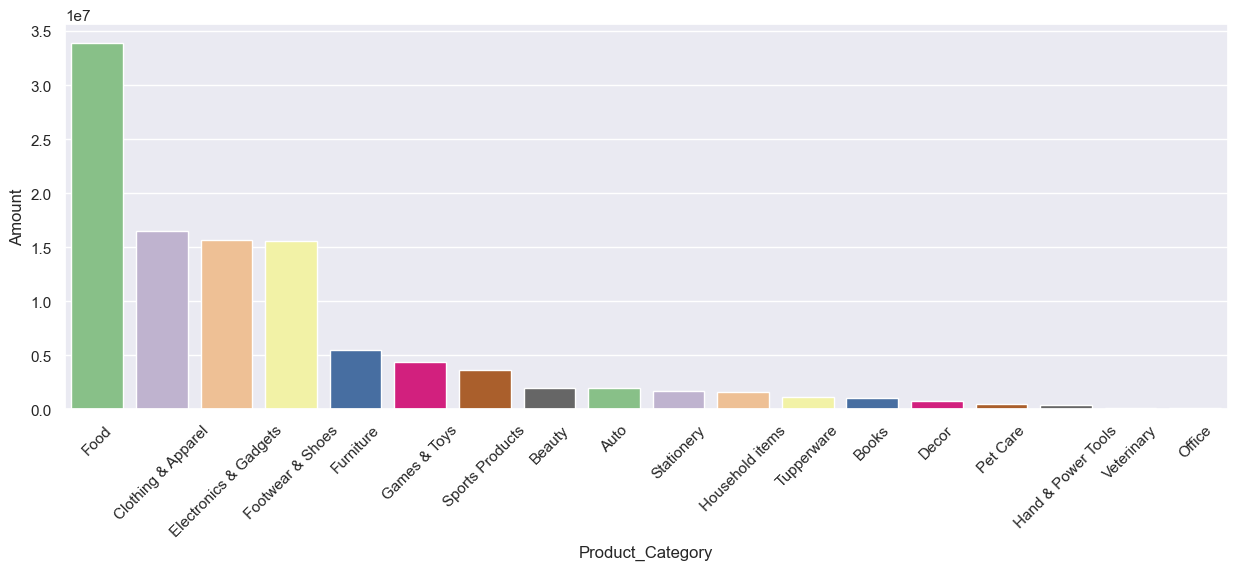

In [33]:
sns.barplot(x="Product_Category", y = "Amount",data = sort, palette = "Accent",hue = "Product_Category")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

In [34]:
sales = df.groupby("Product_ID")["Orders"].sum().reset_index()
sort = sales.sort_values(by = "Orders",ascending = False)
sort.head(10).reset_index(drop = True)


,Product_ID,Orders
0,P00265242,127
1,P00110942,116
2,P00237542,91
3,P00184942,82
4,P00114942,79
5,P00025442,79
6,P00117942,76
7,P00145042,76
8,P00044442,75
9,P00110842,74


In [ ]:
Conclusion:

In [ ]:
# Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category